## Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

# Function Transformers 

## Log Transformation

In [2]:
#make this example reproducible
np.random.seed(0)

#create beta distributed random variable with 200 values
data = np.random.beta(a=4, b=15, size=300)

#create log-transformed data
data_log = np.log(data)

In [3]:
data

array([0.33500995, 0.43164659, 0.17566018, 0.26024996, 0.2228906 ,
       0.34554031, 0.03504304, 0.50466759, 0.26157317, 0.21044716,
       0.24923105, 0.16866343, 0.17532034, 0.08950696, 0.11982994,
       0.18081162, 0.16231937, 0.20493599, 0.07543357, 0.25705616,
       0.26916879, 0.17247234, 0.0917212 , 0.32698623, 0.314534  ,
       0.12921298, 0.20024248, 0.1940494 , 0.08477519, 0.19644552,
       0.31657696, 0.15031079, 0.2119455 , 0.29025744, 0.17332851,
       0.11201222, 0.12394456, 0.12899941, 0.29185698, 0.1881788 ,
       0.10121608, 0.13715135, 0.22102443, 0.12584295, 0.10677733,
       0.08957373, 0.17843215, 0.26457035, 0.10389428, 0.16076094,
       0.23241698, 0.34845572, 0.11502733, 0.09795758, 0.25357618,
       0.34056226, 0.14329336, 0.25809673, 0.13342118, 0.15886293,
       0.27533797, 0.10460863, 0.21672044, 0.23407856, 0.29516348,
       0.18087165, 0.29768723, 0.24729876, 0.2655703 , 0.13791356,
       0.26841048, 0.13256181, 0.35455734, 0.28425268, 0.29730

In [4]:
data_log

array([-1.09359504, -0.84014811, -1.73920393, -1.34611273, -1.50107421,
       -1.06264597, -3.3511784 , -0.6838553 , -1.34104122, -1.55852066,
       -1.3893749 , -1.77985011, -1.74114046, -2.41343891, -2.12168171,
       -1.71029954, -1.81818946, -1.5850576 , -2.58450286, -1.35846068,
       -1.31241663, -1.75751842, -2.38900178, -1.11783723, -1.15666309,
       -2.04629323, -1.60822624, -1.6396425 , -2.46775237, -1.62737014,
       -1.1501889 , -1.89505019, -1.55142611, -1.23698701, -1.75256661,
       -2.18914729, -2.08792093, -2.04794748, -1.23149138, -1.67036272,
       -2.2904976 , -1.9866702 , -1.50948204, -2.07272059, -2.23700961,
       -2.41269316, -1.72354688, -1.32964809, -2.26438144, -1.82783688,
       -1.45922219, -1.05424411, -2.16258552, -2.32322075, -1.372091  ,
       -1.07715734, -1.94286125, -1.35442084, -2.01424439, -1.83971351,
       -1.28975596, -2.25752926, -1.52914703, -1.4520985 , -1.22022592,
       -1.7099676 , -1.21171192, -1.39715812, -1.32587568, -1.98

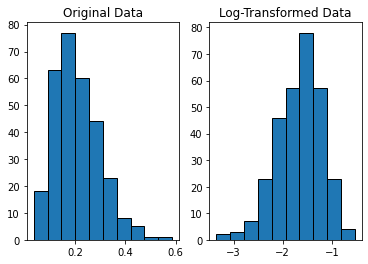

In [5]:
#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(data, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data');

## Reciprocal Transformer 

In [6]:
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from feature_engine.transformation import ReciprocalTransformer

In [7]:
data = fetch_openml(name='house_prices', as_frame=True)

In [8]:
data = data.frame

data["sqrfootpercar"] = data['GarageArea'] / data['GarageCars']
data = data[~data["sqrfootpercar"].isna()]

y = data['SalePrice']
X = data[['GarageCars', 'GarageArea', "sqrfootpercar"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(X_train.head())

      GarageCars  GarageArea  sqrfootpercar
1170           1         358          358.0
330            1         352          352.0
969            1         264          264.0
726            2         540          270.0
1308           2         528          264.0


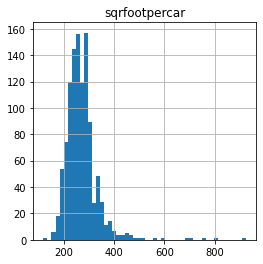

In [9]:
X_train["sqrfootpercar"].hist(bins=50, figsize=(4,4))
plt.title("sqrfootpercar")
plt.show() 

In [10]:
tf = ReciprocalTransformer(variables="sqrfootpercar")

train_t = tf.fit_transform(X_train)
test_t = tf.transform(X_test)

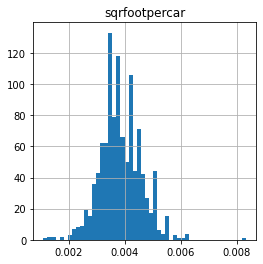

In [11]:
train_t["sqrfootpercar"].hist(bins=50, figsize=(4,4))
plt.title("sqrfootpercar")
plt.show()

## Square Root Transformation 

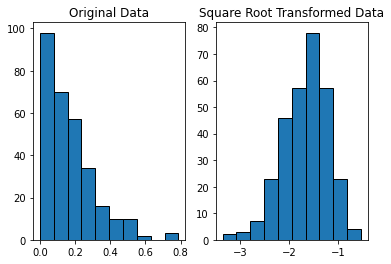

In [12]:
#make this example reproducible
np.random.seed(0)

#create beta distributed random variable with 200 values
data = np.random.beta(a=1, b=5, size=300)

#create log-transformed data
data_sqrt = np.sqrt(data)

#define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(data, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data');